In [74]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [76]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val,y_val = X_train[50000:60000,:],y_train[50000:60000]
X_train,y_train = X_train[:50000,:],y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [77]:
# Reshape lai du lieu cho dung kich thuoc ma keras yeu cau
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val = X_val.reshape(X_val.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print("Du lieu y ban dau:",y_train[0])
print("Du lieu y sau one-hot encoding:",Y_train[0])

Du lieu y ban dau: 5
Du lieu y sau one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [79]:
# Dinh nghia model
model = Sequential()

# Them Convolutional layer voi 32 kernel, kich thuoc 3*3
# dung ham signmoid lam activation va chi ro input_shape cho layer dau tien
model.add(Conv2D(32,(3,3), activation="sigmoid", input_shape=(28,28,1)))

# Them Convolutional layer
model.add(Conv2D(32, (3,3), activation ="sigmoid"))

# Them max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten chuyen tu tensor sang vector
model.add(Flatten())

# Them Fully Connected layer voi 128 nodes va dung ham sigmoid
model.add(Dense(128, activation = "sigmoid"))

# Ouput layer voi 10 node va dung softmax function de chuyen sang xac suat
model.add(Dense(10, activation="softmax"))

# Compile model, chi ro ham loss_func nao duoc su dung, phuong thuc
# dung de toi uu ham loss_func
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Thuc hien train model voi data
# print(X_train.shape)
# print(Y_train.shape)
H = model.fit(X_train, Y_train, validation_data=(X_val,Y_val),batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.3245 - accuracy: 0.9101 - val_loss: 0.0711 - val_accuracy: 0.9820
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0607 - accuracy: 0.9826 - val_loss: 0.0578 - val_accuracy: 0.9832
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0369 - accuracy: 0.9895 - val_loss: 0.0471 - val_accuracy: 0.9865
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0450 - val_accuracy: 0.9873
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.0495 - val_accuracy: 0.9862
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0419 -

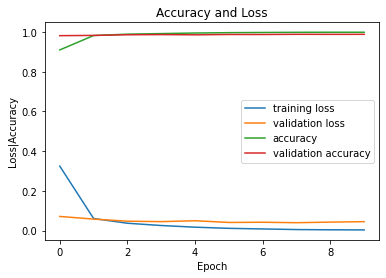

In [87]:
# Ve do thi loss, accuracy cua training set va validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [91]:
# Danh gia model voi du lieu test set
score = model.evaluate(X_test, Y_test,verbose=0)
print(score)

[0.03606770560145378, 0.9896000027656555]


1402
Gia tri du doan: 2


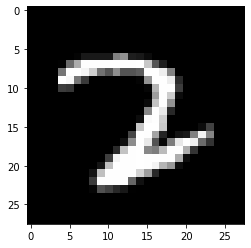

In [109]:
# Du doan anh
k = int(input())
plt.imshow(X_test[k].reshape(28,28),cmap="gray")

y_predict = model.predict(X_test[k].reshape(1,28,28,1))
print("Gia tri du doan:",np.argmax(y_predict))